<a href="https://colab.research.google.com/github/AbedMHroub/covid19_us_ml/blob/master/ML_PROJECT_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries** 





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# **Preparing patients data**

In [0]:
ds = pd.read_csv('us_covid19.csv')
x = ds['num_of_date']
y = ds['num_of_patients']
x_test_patient = ds['num_of_date_test'][:12]
y_test_patient = ds['num_of_patients_test'][:12]
x_prediction =[[95],[96],[97],[98],[99],[100],[101]]
ds.head()

,Date,num_of_date,num_of_patients,Date_test,num_of_date_test,num_of_patients_test
0,2020-01-21,1,1,2020-02-05,16.0,11.0
1,2020-01-22,2,1,2020-02-16,27.0,13.0
2,2020-01-23,3,1,2020-02-22,33.0,15.0
3,2020-01-24,4,2,2020-02-27,38.0,58.0
4,2020-01-25,5,2,2020-03-03,43.0,118.0


In [0]:
x,y_test_patient

(0      1
 1      2
 2      3
 3      4
 4      5
       ..
 78    91
 79    92
 80    93
 81    94
 82    95
 Name: num_of_date, Length: 83, dtype: int64, 0         11.0
 1         13.0
 2         15.0
 3         58.0
 4        118.0
 5        217.0
 6       1663.0
 7      43847.0
 8     161807.0
 9     312237.0
 10    460252.0
 11    657996.0
 Name: num_of_patients_test, dtype: float64)

## **linear_regression**

### Code & Validatio

In [0]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

yy=np.log10(y)

scores = []
######################################################################################################################
Linear_Regression = LinearRegression()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test , yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    Linear_Regression.fit(X_train.values.reshape(-1,1), yy_train)
    scores.append(Linear_Regression.score(X_test.values.reshape(-1,1), yy_test))
    
print("Average score for Linear Regression:",sum(scores)/len(scores))    


Average score for Linear Regression: 0.947731350509466


**After the validation we evaluate the Linear Model:**

### **Evaluation**

In [0]:
Linear_Regression.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_1 =Linear_Regression.predict(x_test_patient.values.reshape(-1,1))
score=Linear_Regression.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
score

0.9303292029481322

### **Prediction for new days**

In [0]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction:
  print('day',predict,'=',int(10**Linear_Regression.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [95] = 2750230
day [96] = 3242796
day [97] = 3823580
day [98] = 4508382
day [99] = 5315832
day [100] = 6267896
day [101] = 7390475


### plot

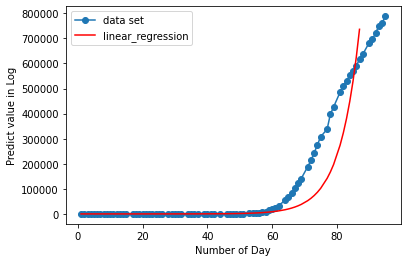

ValueError: ignored

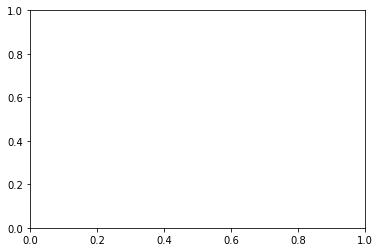

In [0]:
predicted1 = 10**Linear_Regression.predict(x.values.reshape(-1,1)[:76])
predicted11 = 10**Linear_Regression.predict(x.values.reshape(-1,1))
plt.plot(x, y, 'o-',label='data set')
plt.plot(x[:76], predicted1,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()
plt.plot(x, predicted1,label='linear_regression')
plt.scatter(x_test_patient, 10**evaluation_1 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient ,s=50, c='#003300',label='Original values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## **SVR**

### **Code & Validation**

In [0]:
from sklearn.svm import SVR
SVR_model = SVR(kernel='rbf')


scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
######################################################################################################################
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly',degree=5)
SVR_Regressor_3 = SVR(kernel='linear')
SVR_Regressor_4 = SVR(kernel='poly',degree=2)
SVR_Regressor_5 = SVR(kernel='poly',degree=7)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test ,yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    #
    SVR_Regressor_1.fit(X_train.values.reshape(-1,1), y_train)
    scores_1.append(SVR_Regressor_1.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_2.fit(X_train.values.reshape(-1,1), y_train)
    scores_2.append(SVR_Regressor_2.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_3.fit(X_train.values.reshape(-1,1), y_train)
    scores_3.append(SVR_Regressor_3.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_4.fit(X_train.values.reshape(-1,1), y_train)
    scores_4.append(SVR_Regressor_4.score(X_test.values.reshape(-1,1), y_test))
    #
    SVR_Regressor_5.fit(X_train.values.reshape(-1,1), y_train)
    scores_5.append(SVR_Regressor_5.score(X_test.values.reshape(-1,1), y_test))

print("Average score for SVR_Regressor_1:",sum(scores_1)/10,
      "\nAverage score for SVR_Regressor_2:",sum(scores_2)/10,
      "\nAverage score for SVR_Regressor_3:",sum(scores_3)/10,
      "\nAverage score for SVR_Regressor_4:",sum(scores_4)/10,
      "\nAverage score for SVR_Regressor_5:",sum(scores_5)/10)   


Average score for SVR_Regressor_1: -0.3947486705063331 
Average score for SVR_Regressor_2: 0.9540088594110667 
Average score for SVR_Regressor_3: -0.1608372934452422 
Average score for SVR_Regressor_4: -0.387433213590172 
Average score for SVR_Regressor_5: 0.9103206959724819


**After the validation we chosed best parameter for SVR (SVR_Regressor_1) to evaluate:**

### **Evaluation**

In [0]:
SVR_Regressor_2.fit(x.values.reshape(-1,1), y)
y_test_patient_log=np.log10(y_test_patient)
evaluation_2 =SVR_Regressor_2.predict(x_test_patient.values.reshape(-1,1))
score=SVR_Regressor_2.score(x_test_patient.values.reshape(-1,1), y_test_patient)   
score

0.9587420012661088

### Prediction for new days

In [0]:

print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction:
  print('day',predict,'=',int(SVR_Regressor_2.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [95] = 834622
day [96] = 879540
day [97] = 926369
day [98] = 975169
day [99] = 1026003
day [100] = 1078932
day [101] = 1134022


### plot

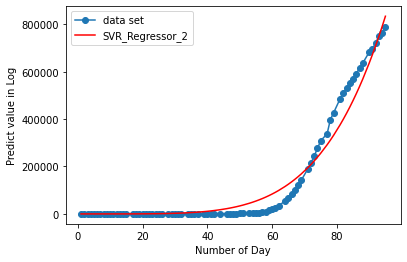

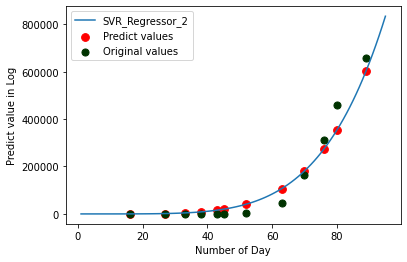

In [0]:
predicted2 = SVR_Regressor_2.predict(x.values.reshape(-1,1))
plt.plot(x, y, 'o-',label='data set')
plt.plot(x, predicted2,c='#ff0000',label='SVR_Regressor_2')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()
plt.plot(x, predicted2,label='SVR_Regressor_2')
plt.scatter(x_test_patient, evaluation_2 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient ,s=50, c='#003300',label='Original values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## MLPRegressor

### **Code & Validation**

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
######################################################################################################################
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(1), activation='tanh', solver='lbfgs' ,learning_rate_init=0.3, max_iter=1000,random_state=120, validation_fraction=0.2)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='sgd' ,learning_rate_init=0.01, max_iter=1000,random_state=1, validation_fraction=0.1)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x):
    X_train, X_test, y_train, y_test ,yy_train, yy_test= x[train_index], x[test_index], y[train_index], y[test_index], yy[train_index], yy[test_index]
    #
    MLP_Regressor_1.fit(X_train.values.reshape(-1,1), yy_train)
    scores_1.append(MLP_Regressor_1.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_2.fit(X_train.values.reshape(-1,1), yy_train)
    scores_2.append(MLP_Regressor_2.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_3.fit(X_train.values.reshape(-1,1), yy_train)
    scores_3.append(MLP_Regressor_3.score(X_test.values.reshape(-1,1), yy_test))
     #
    MLP_Regressor_4.fit(X_train.values.reshape(-1,1), yy_train)
    scores_4.append(MLP_Regressor_4.score(X_test.values.reshape(-1,1), yy_test))
    #
    MLP_Regressor_5.fit(X_train.values.reshape(-1,1), yy_train)
    scores_5.append(MLP_Regressor_5.score(X_test.values.reshape(-1,1), yy_test))

print("Average score for MLP_Regressor_1:",sum(scores_1)/10,"\nAverage score for MLP_Regressor_2:",sum(scores_2)/10,"\nAverage score for MLP_Regressor_3:",sum(scores_3)/10
      ,"\nAverage score for MLP_Regressor_4:",sum(scores_4)/10,"\nAverage score for MLP_Regressor_5:",sum(scores_5)/10)    


Average score for MLP_Regressor_1: 0.9973259107392481 
Average score for MLP_Regressor_2: 0.9979228277995988 
Average score for MLP_Regressor_3: 0.9910101918732378 
Average score for MLP_Regressor_4: -0.22137070515497576 
Average score for MLP_Regressor_5: -0.2732449480660675


**After the validation we chosed best parameter for MLP (MLP_Regressor_2) to evaluate:**

### **Evaluation**

In [0]:
MLP_Regressor = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=120, validation_fraction=0.1)
MLP_Regressor.fit(x.values.reshape(-1,1), yy)
y_test_patient_log=np.log10(y_test_patient)
evaluation_3 =MLP_Regressor.predict(x_test_patient.values.reshape(-1,1))
score=MLP_Regressor.score(x_test_patient.values.reshape(-1,1), y_test_patient_log)   
score

0.9984346234582061

### Prediction for new days

In [0]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction:
  print('day',predict,'=',int(10**MLP_Regressor.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [95] = 781790
day [96] = 801797
day [97] = 822086
day [98] = 842747
day [99] = 863865
day [100] = 885524
day [101] = 907799


### plot

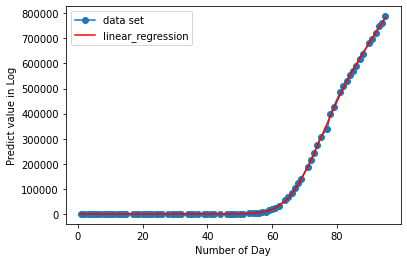

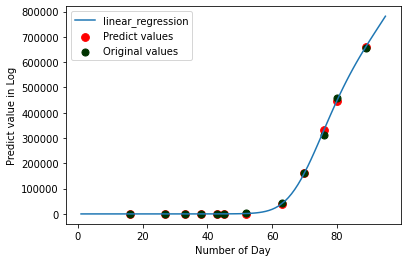

In [0]:
predicted3 = 10**MLP_Regressor.predict(x.values.reshape(-1,1))
plt.plot(x, y, 'o-',label='data set')
plt.plot(x, predicted3,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()
plt.plot(x, predicted3,label='linear_regression')
plt.scatter(x_test_patient, 10**evaluation_3 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_patient, y_test_patient,s=50, c='#003300',label='Original values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## **Conclusion**


	   The Three models in exponantial case 


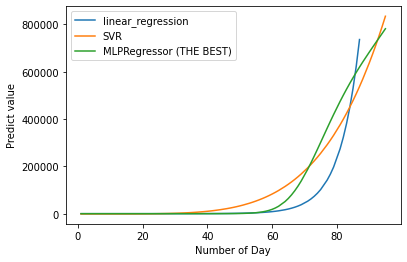


	   The Three models in Log case 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


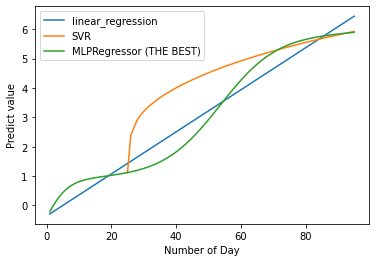


	   The Best model (MLP Model) 


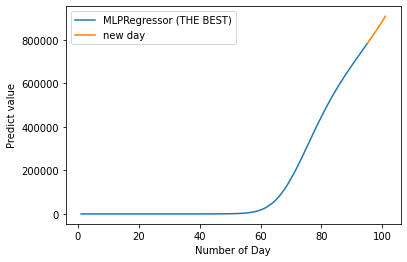


	 The Best model (MLP Model) in Log


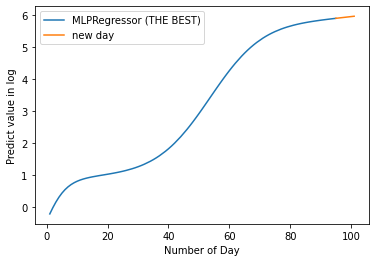

In [0]:
print("\n\t   The Three models in exponantial case ")
plt.plot(x[:76], predicted1,label='linear_regression')
plt.plot(x, predicted2,label='SVR')
plt.plot(x, predicted3,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
##########################################################
print("\n\t   The Three models in Log case ")
plt.plot(x, np.log10(predicted11),label='linear_regression')
plt.plot(x, np.log10(predicted2),label='SVR')
plt.plot(x, np.log10(predicted3),label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
########################################################
print("\n\t   The Best model (MLP Model) ")
plt.plot(x, predicted3,label='MLPRegressor (THE BEST)')
plt.plot(x_prediction, 10**MLP_Regressor.predict(x_prediction),label='new day')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
######################################################
print("\n\t The Best model (MLP Model) in Log")
plt.plot(x, np.log10(predicted3),label='MLPRegressor (THE BEST)')
plt.plot(x_prediction, MLP_Regressor.predict(x_prediction), label='new day')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()



```
print("\n\t   The Three models in Log case ")
plt.plot(X_train, predicted1,label='linear_regression')
plt.plot(X_train, predicted2,label='SVR')
plt.plot(X_train, predicted3,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
print("\n\t\t The Best model (MLP Model)")
plt.plot(X_train, y_train, 'o-',label='data set')
plt.plot(x_evaluation, 10**MLP_Regressor.predict(x_evaluation), 'o-',label='data set')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
print("\n\t The Best model (MLP Model) in Log")
plt.plot(X_train, predicted3,label='data set')
plt.plot(x_evaluation, MLP_Regressor.predict(x_evaluation), label='data set')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()
```



# Deaths

In [0]:
ds_death=pd.read_csv('Deaths_us.csv')
x_death = ds_death['num_of_date']
y_death = ds_death['Deaths']
x_test_deaths = ds_death['num_of_date_test'][:8]
y_test_deaths = ds_death['Deaths_test'][:8]
x_prediction2 =[[60],[61],[62],[63],[64],[65],[67]]
ds_death.head()

#x_test=dtest_death['num_of_date']
#y_test=dtest_death['Deaths']
#x=x.values.reshape(-1,1)
#x_test=x_test.values.reshape(-1,1)
#y_test_new=np.log10(y_test)
#new_y=np.log10(y)

,Date,num_of_date,Deaths,Date_test,num_of_date_test,Deaths_test
0,2020-03-02,1,6,2020-03-18,17.0,171.0
1,2020-03-03,2,9,2020-03-24,23.0,957.0
2,2020-03-04,3,11,2020-04-01,31.0,6394.0
3,2020-03-05,4,12,2020-04-11,41.0,23843.0
4,2020-03-06,5,14,2020-04-22,52.0,47894.0


In [0]:
y_death , y_test_deaths

(0         6
 1         9
 2        11
 3        12
 4        14
 5        17
 6        21
 7        22
 8        30
 9        36
 10       40
 11       47
 12       54
 13       73
 14       95
 15      121
 16      239
 17      309
 18      374
 19      509
 20      689
 21     1260
 22     1614
 23     2110
 24     2754
 25     3251
 26     3948
 27     5027
 28     7438
 29     8694
 30    10231
 31    13128
 32    15347
 33    17503
 34    19604
 35    21830
 36    25558
 37    27272
 38    29825
 39    32443
 40    37147
 41    39014
 42    40575
 43    42853
 44    45536
 45    50236
 46    52191
 47    54256
 48    55412
 49    56796
 50    61655
 51    63856
 Name: Deaths, dtype: int64, 0      171.0
 1      957.0
 2     6394.0
 3    23843.0
 4    47894.0
 5    59266.0
 6    11793.0
 7    34619.0
 Name: Deaths_test, dtype: float64)


## linear_regression


### **Code & Validation**

In [0]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

yy=np.log10(y_death)

scores = []
######################################################################################################################
Linear_Regression = LinearRegression()
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_death):
    X_train_D, X_test_D, y_train_D, y_test_D ,yy_train_D, yy_test_D= x_death[train_index], x_death[test_index], y_death[train_index], y_death[test_index], yy[train_index], yy[test_index]
    
    Linear_Regression.fit(X_train_D.values.reshape(-1,1), yy_train_D)
    scores.append(Linear_Regression.score(X_test_D.values.reshape(-1,1), yy_test_D))
    
print("Average score for Linear Regression:",sum(scores)/10)    


Average score for Linear Regression: 0.8742874590701348


No handles with labels found to put in legend.


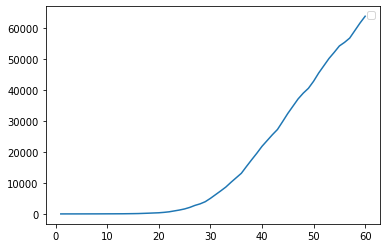

In [0]:
plt.plot(x_death, y_death)
plt.legend()
plt.show()

**After the validation we evaluate the Linear Model:**

### **Evaluation**

In [0]:
Linear_Regression.fit(x_death.values.reshape(-1,1), yy)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_4 =Linear_Regression.predict(x_test_deaths.values.reshape(-1,1))
score=Linear_Regression.score(x_test_deaths.values.reshape(-1,1), y_test_deaths_log)   
score

0.8300935990327268

### Prediction for new days

In [0]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction2:
  print('day',predict,'=',int(10**Linear_Regression.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [60] = 314958
day [61] = 374098
day [62] = 444343
day [63] = 527777
day [64] = 626878
day [65] = 744587
day [67] = 1050462


### plot

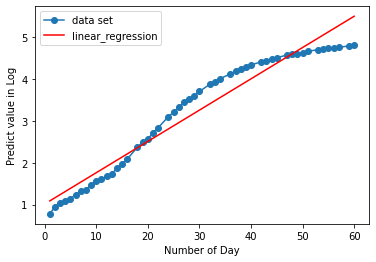

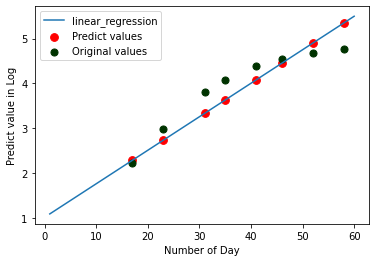

In [0]:
predicted4 = Linear_Regression.predict(x_death.values.reshape(-1,1))
plt.plot(x_death, yy, 'o-',label='data set')
plt.plot(x_death, predicted4,c='#ff0000',label='linear_regression')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()
plt.plot(x_death, predicted4,label='linear_regression')
plt.scatter(x_test_deaths, evaluation_4 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_deaths, y_test_deaths_log ,s=50, c='#003300',label='Original values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## SVR


### **Code & Validation**

In [0]:
from sklearn.svm import SVR


scores_1 = []
scores_2 = []
scores_3 = []
######################################################################################################################
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly',degree=4)
SVR_Regressor_3 = SVR(kernel='linear')
######################################################################################################################
cv = KFold(n_splits=8, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_death):
    X_train_D, X_test_D, y_train_D, y_test_D ,yy_train_D, yy_test_D= x_death[train_index], x_death[test_index], y_death[train_index], y_death[test_index], yy[train_index], yy[test_index]
    #
    SVR_Regressor_1.fit(X_train_D.values.reshape(-1,1), y_train_D)
    scores_1.append(SVR_Regressor_1.score(X_test_D.values.reshape(-1,1), y_test_D))
    #
    SVR_Regressor_2.fit(X_train_D.values.reshape(-1,1), y_train_D)
    scores_2.append(SVR_Regressor_2.score(X_test_D.values.reshape(-1,1), y_test_D))
    #
    SVR_Regressor_3.fit(X_train_D.values.reshape(-1,1), y_train_D)
    scores_3.append(SVR_Regressor_3.score(X_test_D.values.reshape(-1,1), y_test_D))

print("Average score for SVR_Regressor_1:",sum(scores_1)/8,"\nAverage score for SVR_Regressor_2:",sum(scores_2)/8,"\nAverage score for SVR_Regressor_3:",sum(scores_3)/8)    


Average score for SVR_Regressor_1: -0.5473117937312791 
Average score for SVR_Regressor_2: 0.919539558478903 
Average score for SVR_Regressor_3: 0.3446979640411154


**After the validation we chosed best parameter for SVR (SVR_Regressor_1) to evaluate:**

### **Evaluation**

In [0]:
SVR_Regressor_2.fit(x_death.values.reshape(-1,1), y_death)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_5 =SVR_Regressor_2.predict(x_test_deaths.values.reshape(-1,1))
score=SVR_Regressor_2.score(x_test_deaths.values.reshape(-1,1), y_test_deaths)   
score

0.9342479063269598

### Prediction for new days

In [0]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction2:
  print('day',predict,'=',int(SVR_Regressor_2.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [60] = 73019
day [61] = 78009
day [62] = 83251
day [63] = 88753
day [64] = 94523
day [65] = 100570
day [67] = 113530


### plot

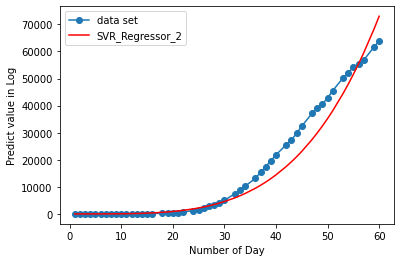

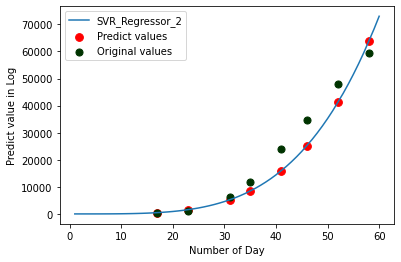

In [0]:
predicted5 = SVR_Regressor_2.predict(x_death.values.reshape(-1,1))
plt.plot(x_death, y_death, 'o-',label='data set')
plt.plot(x_death, predicted5,c='#ff0000',label='SVR_Regressor_2')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()
plt.plot(x_death, predicted5,label='SVR_Regressor_2')
plt.scatter(x_test_deaths, evaluation_5 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_deaths, y_test_deaths ,s=50, c='#003300',label='Original values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## MLPRegressor

### **Code & Validation**

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []

######################################################################################################################
MLP_Regressor_1 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_2 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_3 = MLPRegressor(hidden_layer_sizes=(6), activation='tanh', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_4 = MLPRegressor(hidden_layer_sizes=(4), activation='relu', solver='lbfgs' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
MLP_Regressor_5 = MLPRegressor(hidden_layer_sizes=(4), activation='tanh', solver='sgd' ,learning_rate_init=0.01, max_iter=1000,random_state=93, validation_fraction=0.1)
######################################################################################################################
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(x_death):
    X_train_D, X_test_D, y_train_D, y_test_D ,yy_train_D, yy_test_D= x_death[train_index], x_death[test_index], y_death[train_index], y_death[test_index], yy[train_index], yy[test_index]
    #
    MLP_Regressor_1.fit(X_train_D.values.reshape(-1,1), yy_train_D)
    scores_1.append(MLP_Regressor_1.score(X_test_D.values.reshape(-1,1), yy_test_D))
    #
    MLP_Regressor_2.fit(X_train_D.values.reshape(-1,1), yy_train_D)
    scores_2.append(MLP_Regressor_2.score(X_test_D.values.reshape(-1,1), yy_test_D))
    #
    MLP_Regressor_3.fit(X_train_D.values.reshape(-1,1), yy_train_D)
    scores_3.append(MLP_Regressor_3.score(X_test_D.values.reshape(-1,1), yy_test_D))
    #
    MLP_Regressor_4.fit(X_train_D.values.reshape(-1,1), yy_train_D)
    scores_4.append(MLP_Regressor_4.score(X_test_D.values.reshape(-1,1), yy_test_D))
    #
    MLP_Regressor_5.fit(X_train_D.values.reshape(-1,1), yy_train_D)
    scores_5.append(MLP_Regressor_5.score(X_test_D.values.reshape(-1,1), yy_test_D))

print("Average score for MLP_Regressor_1:",sum(scores_1)/10,"\nAverage score for MLP_Regressor_2:",sum(scores_2)/10,"\nAverage score for MLP_Regressor_3:",sum(scores_3)/10
      ,"\nAverage score for MLP_Regressor_4:",sum(scores_4)/10,"\nAverage score for MLP_Regressor_5:",sum(scores_5)/10)    


Average score for MLP_Regressor_1: 0.9993165614973488 
Average score for MLP_Regressor_2: 0.9995609513286718 
Average score for MLP_Regressor_3: 0.9981683916908921 
Average score for MLP_Regressor_4: 0.9580934079097979 
Average score for MLP_Regressor_5: -1.4673307905588195


**After the validation we chosed best parameter for MLP (MLP_Regressor_2) to evaluate:**

### **Evaluation**

In [0]:

MLP_Regressor_D = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs' 
                               ,learning_rate_init=0.01, max_iter=1000000,random_state=93, validation_fraction=0.1)
MLP_Regressor_D.fit(x_death.values.reshape(-1,1), yy)
y_test_deaths_log=np.log10(y_test_deaths)
evaluation_6 =MLP_Regressor_D.predict(x_test_deaths.values.reshape(-1,1))
score=MLP_Regressor_D.score(x_test_deaths.values.reshape(-1,1), y_test_deaths_log)   
score

0.9998623441881356

### Prediction for new days

In [0]:
print('Evaluation for expecting 6 days in future in Linear_Regression:')
for predict in x_prediction2:
  print('day',predict,'=',int(10**MLP_Regressor_D.predict([predict])))

Evaluation for expecting 6 days in future in Linear_Regression:
day [60] = 63629
day [61] = 65503
day [62] = 67337
day [63] = 69130
day [64] = 70878
day [65] = 72581
day [67] = 75843


### plot

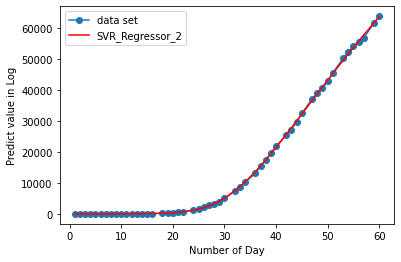

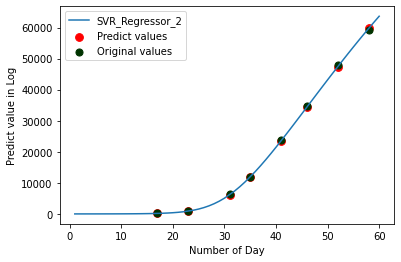

In [0]:
predicted6 = 10**MLP_Regressor_D.predict(x_death.values.reshape(-1,1))
plt.plot(x_death, y_death, 'o-',label='data set')
plt.plot(x_death, predicted6,c='#ff0000',label='SVR_Regressor_2')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()
plt.plot(x_death, predicted6,label='SVR_Regressor_2')
plt.scatter(x_test_deaths, 10**evaluation_6 ,s=60, c='#ff0000',label='Predict values')
plt.scatter(x_test_deaths, y_test_deaths ,s=50, c='#003300',label='Original values')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in Log')
plt.show()

## **Conclusion**


	   The Three models in exponantial case 


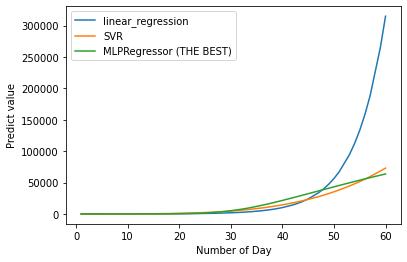


	   The Three models in Log case 


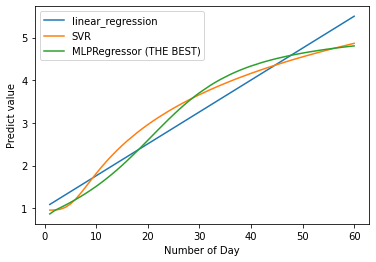


	   The Best model (MLP Model) 


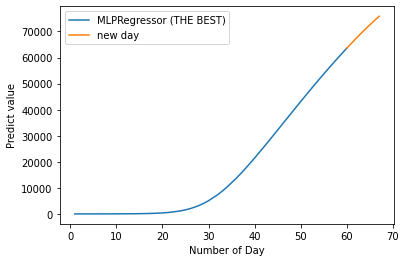


	 The Best model (MLP Model) in Log


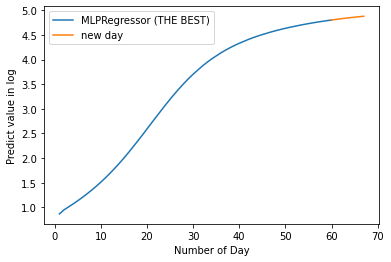

In [0]:
print("\n\t   The Three models in exponantial case ")
plt.plot(x_death, 10**predicted4,label='linear_regression')
plt.plot(x_death, predicted5,label='SVR')
plt.plot(x_death, predicted6,label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
##########################################################
print("\n\t   The Three models in Log case ")
plt.plot(x_death, predicted4,label='linear_regression')
plt.plot(x_death, np.log10(predicted5),label='SVR')
plt.plot(x_death, np.log10(predicted6),label='MLPRegressor (THE BEST)')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
########################################################
print("\n\t   The Best model (MLP Model) ")
plt.plot(x_death, predicted6,label='MLPRegressor (THE BEST)')
plt.plot(x_prediction2, 10**MLP_Regressor_D.predict(x_prediction2),label='new day')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value')
plt.show()
######################################################
print("\n\t The Best model (MLP Model) in Log")
plt.plot(x_death, np.log10(predicted6),label='MLPRegressor (THE BEST)')
plt.plot(x_prediction2, MLP_Regressor_D.predict(x_prediction2), label='new day')
plt.legend()
plt.xlabel('Number of Day')
plt.ylabel('Predict value in log')
plt.show()

